<a href="https://colab.research.google.com/github/MishoK111/ChemiKodi/blob/main/euro_call_option_(no_vectorization).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

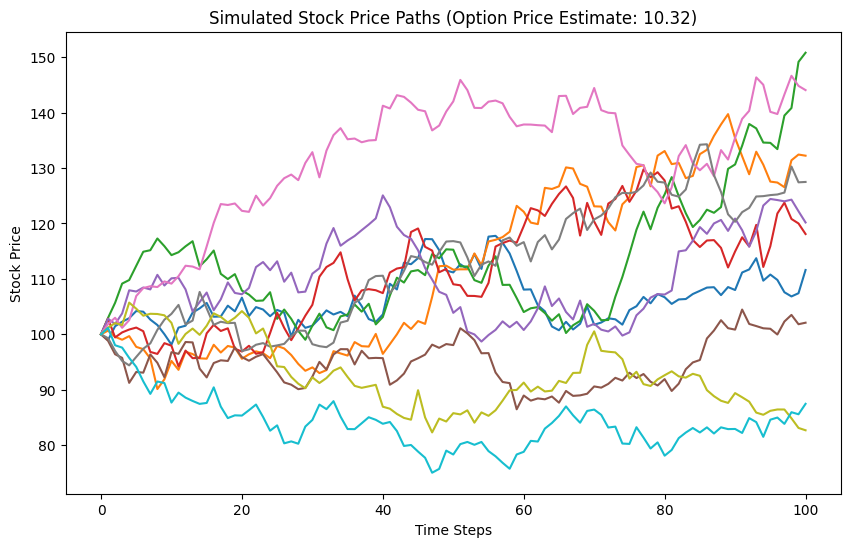

Estimated Option Price: 10.32


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_price_paths(S0, T, r, sigma, n_sim, n_steps):
    """
    Generate stock price paths using a geometric Brownian motion (GBM) model.

    Parameters:
    S0 : float
        Initial stock price.
    T : float
        Time to maturity (in years).
    r : float
        Risk-free interest rate.
    sigma : float
        Volatility of the stock.
    n_sim : int
        Number of Monte Carlo simulations to run.
    n_steps : int
        Number of time steps for each simulation.

    Returns:
    list of lists
        Simulated stock price paths for all simulations and time steps.
    """
    dt = T / n_steps  # Time step size
    price_paths = [[S0] for _ in range(n_sim)]  # Initialize paths with the starting price

    # Generate paths one step at a time for each simulation
    for i in range(n_sim):
        for j in range(1, n_steps + 1):
            # Generate a random shock from a standard normal distribution
            z = np.random.standard_normal()

            # Calculate the next stock price using the GBM formula
            S_prev = price_paths[i][j - 1]
            S_next = S_prev * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * z)

            # Append the new stock price to the path
            price_paths[i].append(S_next)

    return price_paths

def monte_carlo_option_price(S0, K, T, r, sigma, n_sim, n_steps, plot_paths=False):
    """
    Estimate the European call option price using Monte Carlo simulation.

    Parameters:
    S0 : float
        Initial stock price.
    K : float
        Strike price of the option.
    T : float
        Time to maturity (in years).
    r : float
        Risk-free interest rate.
    sigma : float
        Volatility of the stock.
    n_sim : int
        Number of Monte Carlo simulations to run.
    n_steps : int
        Number of time steps for each simulation.
    plot_paths : bool, optional
        Whether to plot some of the simulated stock price paths (default is False).

    Returns:
    float
        The estimated price of the option.
    list of lists
        Simulated stock price paths for further analysis if needed.
    """
    # Generate stock price paths
    price_paths = generate_price_paths(S0, T, r, sigma, n_sim, n_steps)

    # Calculate the payoff for each simulation at maturity (max(S_T - K, 0))
    payoffs = []
    for path in price_paths:
        S_T = path[-1]  # Final price at maturity
        payoff = max(S_T - K, 0)
        payoffs.append(payoff)

    # Discount the average payoff back to present value to get the option price
    option_price = np.exp(-r * T) * (sum(payoffs) / n_sim)

    # If requested, plot the first 10 simulated price paths
    if plot_paths:
        plt.figure(figsize=(10, 6))
        for i in range(min(10, n_sim)):  # Plot the first 10 paths (or fewer if n_sim < 10)
            plt.plot(price_paths[i], lw=1.5)
        plt.title(f"Simulated Stock Price Paths (Option Price Estimate: {option_price:.2f})")
        plt.xlabel("Time Steps")
        plt.ylabel("Stock Price")
        plt.show()

    return option_price, price_paths

# Parameters
S0 = 100    # Initial stock price
K = 100     # Strike price
T = 1.0     # Time to maturity in years
r = 0.05    # Risk-free interest rate
sigma = 0.2 # Volatility
n_sim = 10000   # Number of Monte Carlo simulations
n_steps = 100   # Number of time steps in each simulation

# Estimate the option price using the Monte Carlo method
price, paths = monte_carlo_option_price(S0, K, T, r, sigma, n_sim, n_steps, plot_paths=True)

# Output the estimated option price
print(f"Estimated Option Price: {price:.2f}")